In [1]:
using LinearAlgebra 
using Kronecker
using MKL
using Plots, PyPlot
using Random, Distributions
using RandomMatrices


(process:13780): GLib-GIO-WARNING **: 16:46:54.124: Unexpectedly, UWP app `KDEe.V.Okular_22.801.1132.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


In [2]:
#Defining the Basic Gates



#The X,Y,Z gates:

X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];

# The Hadamard and the Phase Gates:

H=1/sqrt(2)*[1 1 ; 1 -1];
S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];


#The finite X,Y,Z Rotations:


function RX(r)
    exp(-im*r/2*X)
end


function RY(r)
    exp(-im*r/2*Y)
end


function RZ(r)
    exp(-im*r/2*Z)
end


#The two-body gates:

CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);

In [27]:
#Perfect Kicks: Constructing the background Z field and the X kicks

o=pi;
h=rand(12)*2*pi;
J=rand(12)*pi;
#XRow=copy(kronecker(X,X,X,X,X,X,X,X,X,X,X,X));
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRow=copy(kronecker(RZ(h[1]),RZ(h[2]),RZ(h[3]),RZ(h[4]),RZ(h[5]),RZ(h[6]),RZ(h[7]),RZ(h[8]),RZ(h[9]),RZ(h[10]),RZ(h[11]),RZ(h[12])));


In [17]:
#Introducing the Imperfection in kicks

epsilon=0.39
o=pi-epsilon;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));

In [17]:
#Constructing the Random Brickwall 


fone=copy(kronecker(Z,Z))
FU=fill(fill(0.1+im, 4,4), 11);


    for j in 1:length(FU)
    FU[j]=exp(-im*J[j]*fone);
    end


    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
    UEven=copy(kronecker(I(2),FU[7],FU[8],FU[9],FU[10],FU[11],I(2)));


A=XRow*UEven*UOdd*ZRow;


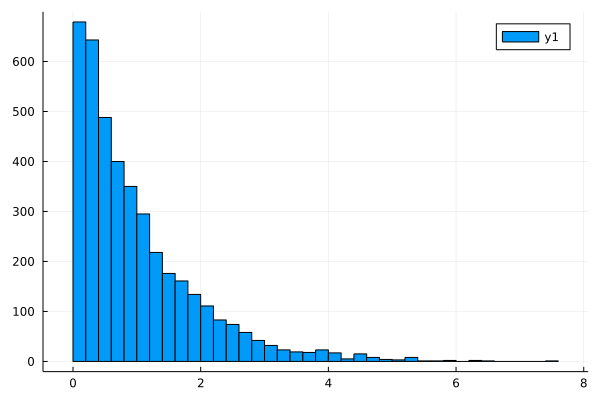

In [18]:
     
    
EigA=eigvals(A);

N=fill(0.1,length(EigA))
N=angle.(EigA);

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

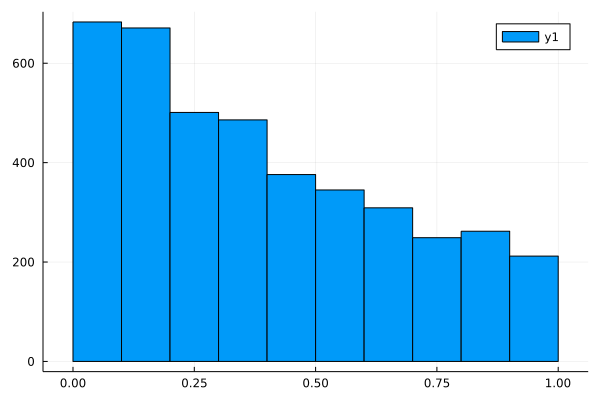

In [19]:

n=fill(0.1,length(EigA)-2);

for i in 1:length(n)
    #n[i]=m[i+1]/m[i];
    n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
end

histogram(n)

In [26]:
mean(n)

0.3906865151534159

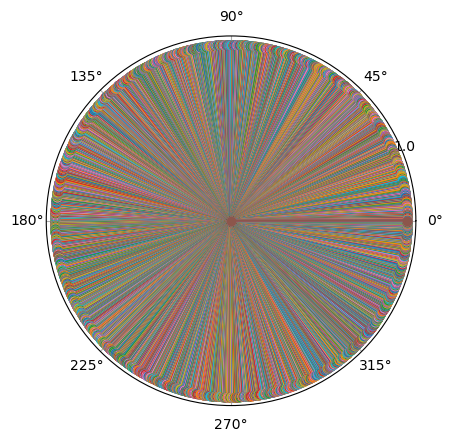

4096-element Vector{Vector{PyCall.PyObject}}:
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BB2620>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BB3D00>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BB3E80>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF0040>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF01C0>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF0340>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF04C0>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF0640>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF07C0>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF0940>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BB2D70>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BB1060>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF0880>]
 ⋮
 [PyObject <matplotlib.lines.Line2D object at 0x00000000ADD474C0>]
 [PyObject <m

In [9]:
polar.(Base.vect.(0.0,angle.(EigA)),Base.vect.(0.0,abs.(EigA)),marker="o")

DTC

In [11]:
Zi=fill(fill(0.1+im, 4096,4096), 12);



Zi[1]=copy(kronecker(Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[2]=copy(kronecker(I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[3]=copy(kronecker(I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[4]=copy(kronecker(I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[5]=copy(kronecker(I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[6]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[7]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2)));
Zi[8]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2)));
Zi[9]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2)));
Zi[10]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2)));
Zi[11]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2)));
Zi[12]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z));

In [12]:
Cii=fill(0.1, 12,25);

In [21]:
At=I(4096)
Atdag=I(4096)
Adag=conj(transpose(A))

for t in 1:25
   # for l in 1:12
        LM=copy(Zi[5]*Atdag*Zi[5]*At);
        Cii[5,t]=real(LM[1365,1365]);
  #  end
    At=A*At;
    Atdag=Atdag*Adag;
end

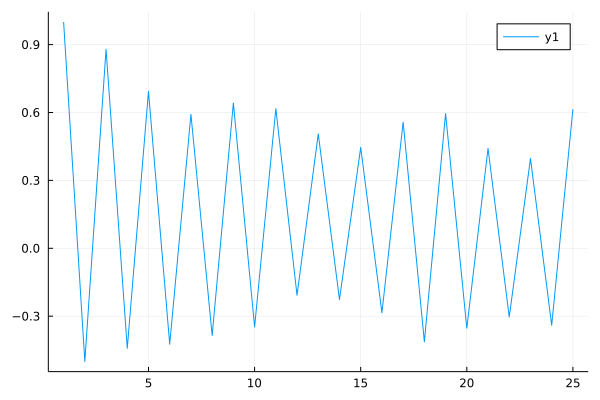

In [22]:
xax=1:25
Plots.plot(xax,Cii[5,:])

Exporting Plots:

In [25]:

gr();
 
#plot
#histogram(n)
xax=1:25
Plots.plot(xax,Cii[5,:])
#save plot
Plots.savefig("fig/DTC-Vedika-MBL-g_pi_3-r.png")